# K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.spatial.distance import euclidean
from sklearn.datasets import make_blobs

## References

* https://en.wikipedia.org/wiki/K-means_clustering

## Setup

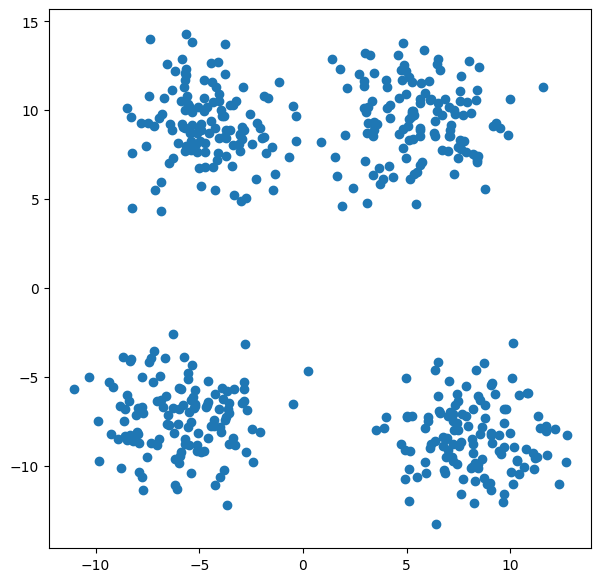

In [2]:
n_samples, n_features = 500, 2
n_clusters = 4
X, y = make_blobs(
    n_samples=n_samples, centers=n_clusters, n_features=n_features, cluster_std=2, random_state=31
)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.scatter(x=X[:, 0], y=X[:, 1])

plt.show()

## Naive K-Means

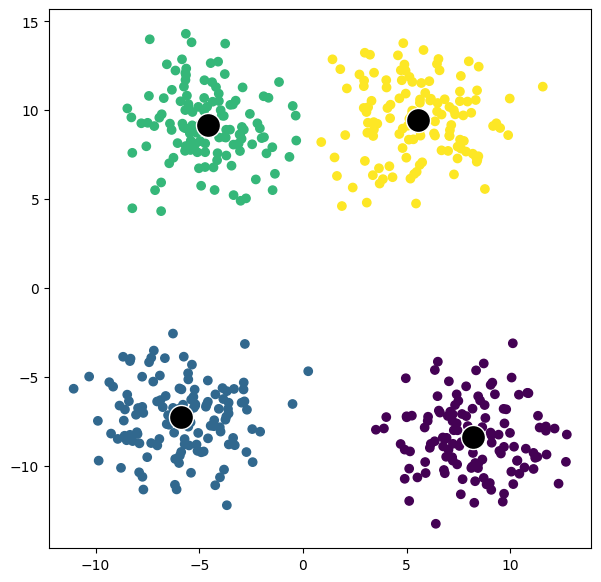

In [3]:
np.random.seed(1)
n_iters = 10

cluster_centroids = X[np.random.randint(0, n_samples, size=n_clusters)]

cluster_id_history = []
cluster_centroids_history = []
cluster_centroids_history.append(cluster_centroids)

for iter_ in range(n_iters):

    cluster_distances = []
    for i in range(n_samples):
        sample_distances = []
        for c_idx in range(n_clusters):
            sample_distances.append(euclidean(X[i], cluster_centroids[c_idx]))
        cluster_distances.append(sample_distances)
    cluster_id = np.argmin(cluster_distances, axis=1)

    cluster_id_history.append(cluster_id)

    new_cluster_centroids = np.random.random(cluster_centroids.shape)
    for c_idx in range(n_clusters):
        cluster_datapoints = X[cluster_id == c_idx]
        if len(cluster_datapoints) > 0:
            new_cluster_centroids[c_idx] = cluster_datapoints.mean(axis=0)

    if (new_cluster_centroids == cluster_centroids).sum() == sum(
        cluster_centroids.shape
    ):
        print("early break")
        break
    else:
        cluster_centroids = new_cluster_centroids
        cluster_centroids_history.append(cluster_centroids)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.scatter(x=X[:, 0], y=X[:, 1], c=cluster_id)
ax.scatter(
    x=cluster_centroids[:, 0],
    y=cluster_centroids[:, 1],
    color="black",
    marker="o",
    s=300,
    edgecolor="white"
)
plt.show()

### Animation

In [4]:
from utility import cluster_animation

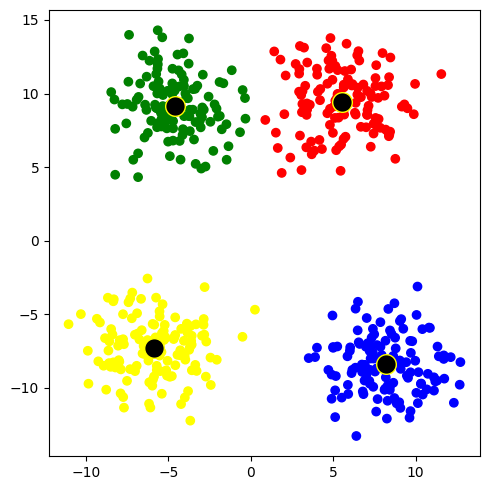

In [5]:
cluster_animation(
    X=X,
    cluster_id_history=cluster_id_history,
    cluster_centroids_history=cluster_centroids_history,
    iterations=n_iters,
    interval=1000,
)